## Metodologia

### Importação das bibliotecas

In [24]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import patches
from IPython.display import Markdown
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report,cohen_kappa_score
from sklearn import metrics

### Importação do dataset

In [25]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [26]:
dict_path = Path("../data/external/dicionario.csv")
df_dict = pd.read_csv(dict_path)
df_dict

,variavel,significado,valores,tipo
0,gender,Gênero do estudante,"[""Male"", ""Female""]",Nomial
1,NationallTy,Nacionalidade do estudante,"[""Kuwait"", ""Lebanon"", ""Egypt"", ""SaudiArabia"", ...",Nomial
2,PlaceofBirth,Local de nascimento do estudante,"[""Kuwait"", ""Lebanon"", ""Egypt"", ""SaudiArabia"", ...",Nomial
3,StageID,Nivel educacional do estudante,"[""lowerlevel"", ""MiddleSchool"", ""HighSchool""]",Ordinal
4,GradeID,Turma a qual o aluno pertence,"[""G-01"", ""G-02"", ""G-03"", ""G-04"", ""G-05"", ""G-06...",Nomial
5,SectionID,Sala de aula a qual o aluno pertence,"[""A"", ""B"", ""C""]",Nomial
6,Topic,Topico do curso,"[""English"", ""Spanish"", ""French"", ""Arabic"", ""IT...",Nomial
7,Semester,Semestre letivo,"[""First"", ""Second""]",Ordinal
8,Relation,Parente responsavel pelo estudante,"[""Mom"", ""Father""]",Nomial
9,raisedhands,Quantas vezes o estudante levanta sua mão na s...,[0 - 100],Discreta


### Categorizando as váriaveis nominais de forma numerica

In [27]:
X = pd.DataFrame()

X['gender'] = df.gender.replace({'M':0,'F':1})
X['StageID'] = df.StageID.replace({'lowerlevel':0,'MiddleSchool':1,'HighSchool':2})

X['Semester'] = df.Semester.replace({'F':0,'S':1})
X['Relation'] = df.Relation.replace({'Father':0,'Mum':1})
X['ParentAnsweringSurvey'] = df.ParentAnsweringSurvey.replace({'Yes':0,'No':1})
X['StudentAbsenceDays'] = df.StudentAbsenceDays.replace({'Under-7':0,'Above-7':1})
X = pd.concat((X,df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]),axis=1)
Y = df.Class.replace({'L':0,'M':1,'H':2})

In [28]:
X.head()

,gender,StageID,Semester,Relation,ParentAnsweringSurvey,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,0,0,0,0,0,0,15,16,2,20
1,0,0,0,0,0,0,20,20,3,25
2,0,0,0,0,1,1,10,7,0,30
3,0,0,0,0,1,1,30,25,5,35
4,0,0,0,0,1,1,40,50,12,50


### Divisão dos dados em treino e teste

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Classificação
#### KNN

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
model_knn.score(x_test,y_test)

0.6458333333333334

#### Regressão Logisitica

In [31]:
log_reg = LogisticRegression()
model_reg = log_reg.fit(x_train,y_train)
pred_log_reg = model_reg.predict(x_test)
model_reg.score(x_test, y_test)

c:\Users\stefane.santos\Anaconda3\envs\pdi\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7708333333333334

#### Naive Bayes

In [32]:
naive = MultinomialNB()
model_naive = naive.fit(x_train,y_train)
pred_naive = model_naive.predict(x_test)
model_naive.score(x_test, y_test)

0.5416666666666666

### Arvores de decisão

In [33]:
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42,max_depth=15)
model_tree = tree.fit(x_train, y_train)
pred_tree = model_tree.predict(x_test)
model_tree.score(x_test, y_test)

0.6875

### TO DO
1. Pesquisar outras formas de categorizar numericamente as váriaveis nominais.
2. Analisar a matriz de correlação para verificar quais variaveis são mais influentes para a classificação
3. Verificar se é necessário normalizar os valores.

## Configuração do experimento

## Resultados

In [55]:
def score(y_test,y_pred,title):
    y_score = accuracy_score(y_test,y_pred)
  
    print('\n')
    
    print('Classification Report')
    print(classification_report(y_test,y_pred,target_names=["Low-Level", "Middle-Level", "High-Level"]))
    
    matrix = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    ax = sns.heatmap(matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    ax.set_ylabel('Actual label')
    ax.set_xlabel('Predicted label')
    ax.xaxis.set_ticklabels(["Low-Level", "Middle-Level", "High-Level"])
    ax.yaxis.set_ticklabels(["Low-Level", "Middle-Level", "High-Level"])
    plt.title(title, size = 15)



Classification Report
              precision    recall  f1-score   support

   Low-Level       0.71      0.63      0.67        19
Middle-Level       0.54      0.69      0.61        36
  High-Level       0.76      0.61      0.68        41

    accuracy                           0.65        96
   macro avg       0.67      0.65      0.65        96
weighted avg       0.67      0.65      0.65        96



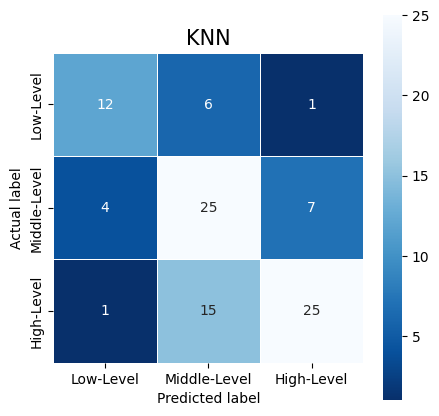

In [56]:
score(y_test,pred_knn,"KNN")



Classification Report
              precision    recall  f1-score   support

   Low-Level       0.76      0.84      0.80        19
Middle-Level       0.70      0.72      0.71        36
  High-Level       0.84      0.78      0.81        41

    accuracy                           0.77        96
   macro avg       0.77      0.78      0.77        96
weighted avg       0.77      0.77      0.77        96



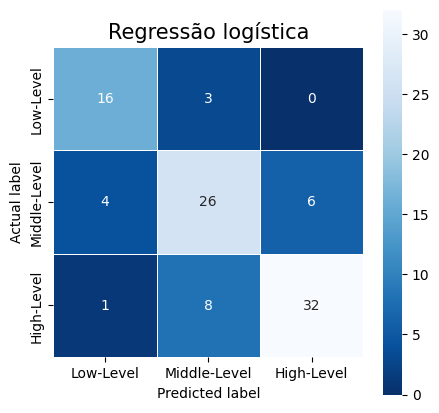

In [57]:
score(y_test,pred_log_reg,"Regressão logística")



Classification Report
              precision    recall  f1-score   support

   Low-Level       0.52      0.74      0.61        19
Middle-Level       0.47      0.47      0.47        36
  High-Level       0.64      0.51      0.57        41

    accuracy                           0.54        96
   macro avg       0.54      0.57      0.55        96
weighted avg       0.55      0.54      0.54        96



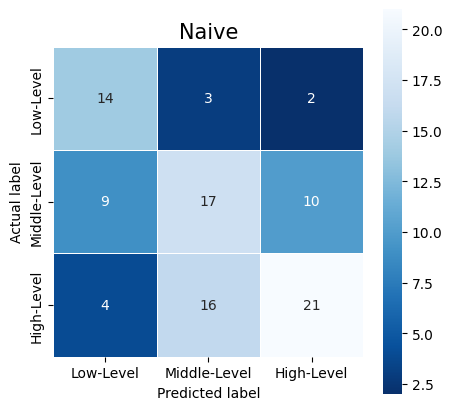

In [58]:
score(y_test,pred_naive,"Naive")



Classification Report
              precision    recall  f1-score   support

   Low-Level       0.73      0.84      0.78        19
Middle-Level       0.57      0.67      0.62        36
  High-Level       0.81      0.63      0.71        41

    accuracy                           0.69        96
   macro avg       0.70      0.71      0.70        96
weighted avg       0.71      0.69      0.69        96



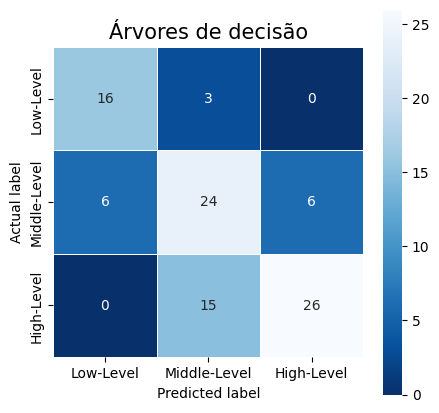

In [59]:
score(y_test,pred_tree,"Árvores de decisão")

## Discussão